# Part 3: Spam Classification using Recurrent Neural Networks
Objective: The objective of this assignment is to develop an RNN model for spam classification. You will use a dataset containing SMS messages labeled as spam or ham (not spam). You will use this data to train an RNN model to classify messages as spam or not spam.


In [2]:
pip install torchtext

  Obtaining dependency information for torchtext from https://files.pythonhosted.org/packages/ce/e1/b1d577578800a603cbeead5f52d46649a413a8132414131a944284fdaeb5/torchtext-0.17.2-cp311-cp311-win_amd64.whl.metadata
  Using cached torchtext-0.17.2-cp311-cp311-win_amd64.whl.metadata (7.9 kB)
Using cached torchtext-0.17.2-cp311-cp311-win_amd64.whl (1.9 MB)
Note: you may need to restart the kernel to use updated packages.


In [45]:
#importing all required libraries

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import torch
import tensorflow as tf
from tensorflow.keras import layers, models, preprocessing

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# 1.	Download the spam classification dataset from Kaggle. 

In [46]:
#Downloaded the data 
df = pd.read_csv('SPAM text message 20170820 - Data.csv')

In [47]:
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


# 2.	Load and pre-process the data by converting the message into sequences of tokens, padding the sequences to a fixed length, and splitting the data into training and testing sets.

In [48]:
#finding the categorical counts
df['Category'].value_counts()

ham     4825
spam     747
Name: Category, dtype: int64

In [49]:
#Finding the missing values
df.isna().sum()

Category    0
Message     0
dtype: int64

In [50]:
# Setting a specific seed for reproducible randomness
SEED = 1234
torch.manual_seed(SEED)
torch.backends.cudnn.deterministic = True

In [51]:
# Adding vocabulary size to tokenize
MAX_VOC_SIZE = 3000
tokenizer = Tokenizer(num_words = MAX_VOC_SIZE)
tokenizer.fit_on_texts(df['Message'])
df['Sequence'] = tokenizer.texts_to_sequences(df['Message'])

In [52]:
df

,Category,Message,Sequence
0,ham,"Go until jurong point, crazy.. Available only ...","[49, 471, 840, 755, 658, 65, 8, 1327, 88, 123,..."
1,ham,Ok lar... Joking wif u oni...,"[46, 336, 1499, 472, 6, 1940]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"[47, 489, 8, 19, 4, 796, 901, 2, 175, 1941, 11..."
3,ham,U dun say so early hor... U c already then say...,"[6, 247, 150, 23, 381, 2995, 6, 139, 153, 57, ..."
4,ham,"Nah I don't think he goes to usf, he lives aro...","[1024, 1, 98, 108, 69, 490, 2, 961, 69, 1944, ..."
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,"[40, 9, 5, 446, 63, 39, 17, 560, 19, 201, 6, 6..."
5568,ham,Will ü b going to esplanade fr home?,"[33, 77, 183, 75, 2, 2046, 861, 80]"
5569,ham,"Pity, * was in mood for that. So...any other s...","[60, 8, 1326, 12, 20, 23, 107, 250]"
5570,ham,The guy did some bitching but I acted like i'd...,"[5, 533, 114, 116, 24, 1, 55, 902, 35, 1254, 8..."


In [53]:
#Encoding the category column
labelencoder = LabelEncoder()
df['Cat_encoded'] = labelencoder.fit_transform(df['Category'])

In [54]:
df

,Category,Message,Sequence,Cat_encoded
0,ham,"Go until jurong point, crazy.. Available only ...","[49, 471, 840, 755, 658, 65, 8, 1327, 88, 123,...",0
1,ham,Ok lar... Joking wif u oni...,"[46, 336, 1499, 472, 6, 1940]",0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"[47, 489, 8, 19, 4, 796, 901, 2, 175, 1941, 11...",1
3,ham,U dun say so early hor... U c already then say...,"[6, 247, 150, 23, 381, 2995, 6, 139, 153, 57, ...",0
4,ham,"Nah I don't think he goes to usf, he lives aro...","[1024, 1, 98, 108, 69, 490, 2, 961, 69, 1944, ...",0
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,"[40, 9, 5, 446, 63, 39, 17, 560, 19, 201, 6, 6...",1
5568,ham,Will ü b going to esplanade fr home?,"[33, 77, 183, 75, 2, 2046, 861, 80]",0
5569,ham,"Pity, * was in mood for that. So...any other s...","[60, 8, 1326, 12, 20, 23, 107, 250]",0
5570,ham,The guy did some bitching but I acted like i'd...,"[5, 533, 114, 116, 24, 1, 55, 902, 35, 1254, 8...",0


In [55]:
#Splitting the data into test train 
X = df['Sequence']
Y = df['Cat_encoded']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2)

In [56]:
#Padding sequences to all into one length
X_train = pad_sequences(X_train)
X_test = pad_sequences(X_test)
X_train

array([[   0,    0,    0, ...,   46,  359,  580],
       [   0,    0,    0, ...,  379, 1734,  179],
       [   0,    0,    0, ...,  239,   36,    3],
       ...,
       [   0,    0,    0, ...,  301,  214,   87],
       [   0,    0,    0, ..., 2750,  172,   65],
       [   0,    0,    0, ...,    3,  215,  307]])

# 3.	Build an RNN model using libraries such as Keras or PyTorch to classify messages as spam or ham.

In [57]:
#Defining the model
def model1():
    model = models.Sequential()
    model.add(layers.Embedding(input_dim=1000, output_dim=128))
    model.add(layers.GlobalMaxPooling1D())
    model.add(layers.Dense(10, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    return model

# 4.	Train the model using the training set and evaluate the model using the testing set.

In [58]:
#Compiling and fitting the model.
model = model1()
model.compile(optimizer = 'adam', loss= 'binary_crossentropy', metrics =['accuracy', 'precision','recall','F1Score'])
history = model.fit(X_train, Y_train, epochs = 10, validation_data = (X_test, Y_test))

Epoch 1/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - F1Score: 0.2235 - accuracy: 0.8471 - loss: 0.4364 - precision: 0.1333 - recall: 0.0393 - val_F1Score: 0.2316 - val_accuracy: 0.8691 - val_loss: 0.2899 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - F1Score: 0.2374 - accuracy: 0.8740 - loss: 0.2326 - precision: 0.4184 - recall: 0.0646 - val_F1Score: 0.2316 - val_accuracy: 0.9578 - val_loss: 0.1419 - val_precision: 1.0000 - val_recall: 0.6781
Epoch 3/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - F1Score: 0.2396 - accuracy: 0.9758 - loss: 0.1321 - precision: 1.0000 - recall: 0.8222 - val_F1Score: 0.2316 - val_accuracy: 0.9803 - val_loss: 0.1203 - val_precision: 1.0000 - val_recall: 0.8493
Epoch 4/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - F1Score: 0.2299 - accuracy: 0.9890 - loss: 0.1039 - precision: 1.0000 - recall: 0.9156 - val_F1Score: 0.2316 - val_accuracy: 0.9830 - val_loss: 0.1105 - val_precision: 1.0000 - val_recall:

In [59]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)              │ (None, 176, 128)            │         128,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d_1               │ (None, 128)                 │               0 │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 10)                  │           1,290 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 387,905 (1.48 MB)

 Trainable params: 129,301 (505.08 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 258,604 (1010.18 KB)

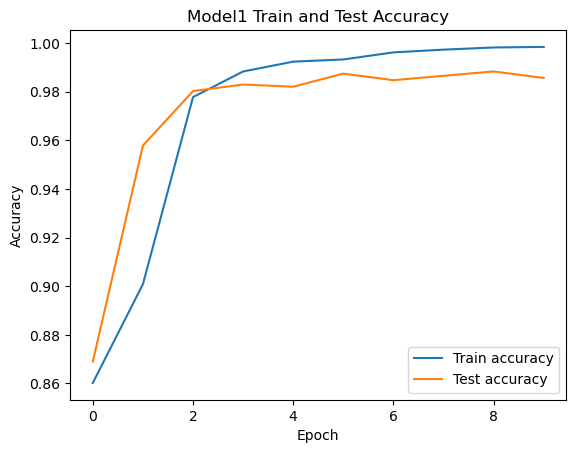

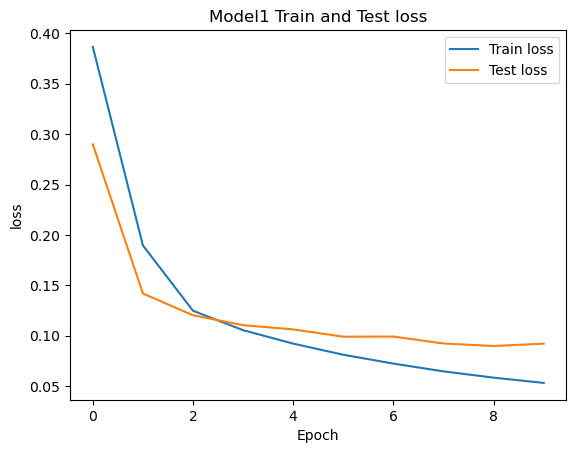

In [60]:
model1_train_acc = history.history['accuracy'][-1]
model1_test_acc = history.history['val_accuracy'][-1]
model1_train_acc = history.history['accuracy'][-1]
model1_test_acc = history.history['val_accuracy'][-1]

#plotting test vs train accuracies and losses 
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Test accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model1 Train and Test Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.title('Model1 Train and Test loss')
plt.legend()
plt.show()

# 5.	Experiment with different hyperparameters and architectures to improve the performance of the model.

In [61]:
#Defining the model2.
def model2():
    model = models.Sequential()
    model.add(layers.Embedding(input_dim=1000, output_dim=128))
    model.add(layers.Bidirectional(layers.SimpleRNN(64)))
    model.add(layers.Dense(10, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    return model


In [62]:
model2 = model2()
model2.compile(optimizer = 'adam', loss= 'binary_crossentropy', metrics =['accuracy','precision','recall','F1Score'])
history2 = model2.fit(X_train, Y_train, epochs = 10, validation_data = (X_test, Y_test))

Epoch 1/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 15s 60ms/step - F1Score: 0.2382 - accuracy: 0.8725 - loss: 0.2925 - precision: 0.5372 - recall: 0.3452 - val_F1Score: 0.2316 - val_accuracy: 0.9821 - val_loss: 0.0610 - val_precision: 0.9701 - val_recall: 0.8904
Epoch 2/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 8s 54ms/step - F1Score: 0.2412 - accuracy: 0.9873 - loss: 0.0515 - precision: 0.9796 - recall: 0.9275 - val_F1Score: 0.2316 - val_accuracy: 0.9865 - val_loss: 0.0519 - val_precision: 0.9781 - val_recall: 0.9178
Epoch 3/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 8s 56ms/step - F1Score: 0.2400 - accuracy: 0.9939 - loss: 0.0244 - precision: 0.9927 - recall: 0.9617 - val_F1Score: 0.2316 - val_accuracy: 0.9857 - val_loss: 0.0490 - val_precision: 0.9392 - val_recall: 0.9521
Epoch 4/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 8s 55ms/step - F1Score: 0.2405 - accuracy: 0.9955 - loss: 0.0161 - precision: 0.9961 - recall: 0.9709 - val_F1Score: 0.2316 - val_accuracy: 0.9848 - val_loss: 0.0636 - val_precision: 1.0000 - val_recall: 0.

In [63]:
model2.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_6 (Embedding)              │ (None, 176, 128)            │         128,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_4 (Bidirectional)      │ (None, 128)                 │          24,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 10)                  │           1,290 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 462,017 (1.76 MB)

 Trainable params: 154,005 (601.58 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 308,012 (1.17 MB)

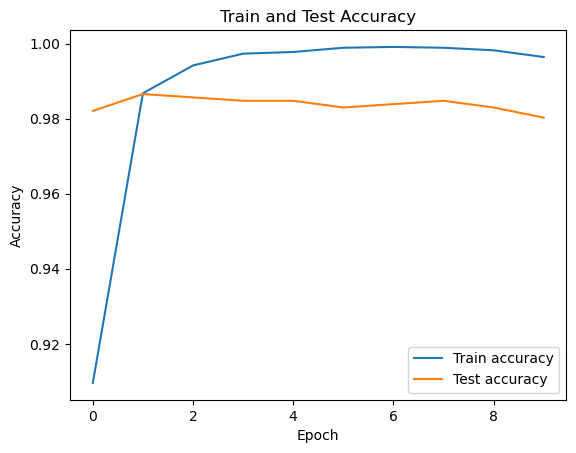

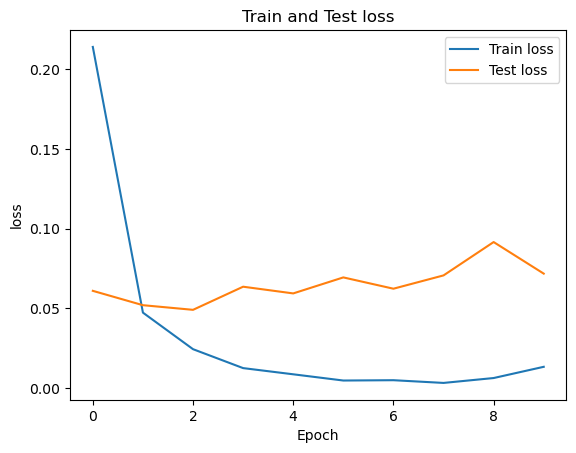

In [64]:
model2_train_acc = history2.history['accuracy'][-1]
model2_test_acc = history2.history['val_accuracy'][-1]
model2_train_acc = history2.history['accuracy'][-1]
model2_test_acc = history2.history['val_accuracy'][-1]

#plotting test vs train accuracies and losses 
plt.plot(history2.history['accuracy'], label='Train accuracy')
plt.plot(history2.history['val_accuracy'], label='Test accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Train and Test Accuracy')
plt.legend()
plt.show()

plt.plot(history2.history['loss'], label='Train loss')
plt.plot(history2.history['val_loss'], label='Test loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.title('Train and Test loss')
plt.legend()
plt.show()

In [65]:
#Defing the model3
def model3():
    model = models.Sequential()
    model.add(layers.Embedding(input_dim=1000, output_dim=128))
    model.add(layers.Bidirectional(layers.LSTM(64)))
    model.add(layers.Dense(10, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    return model
model3 = model3()
model3.compile(optimizer = 'adam', loss= 'binary_crossentropy', metrics =['accuracy','precision','recall','F1Score'])
history3 = model3.fit(X_train, Y_train, epochs = 10, validation_data = (X_test, Y_test))

Epoch 1/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 29s 148ms/step - F1Score: 0.2387 - accuracy: 0.8884 - loss: 0.3128 - precision: 0.6063 - recall: 0.2618 - val_F1Score: 0.2316 - val_accuracy: 0.9848 - val_loss: 0.0553 - val_precision: 0.9778 - val_recall: 0.9041
Epoch 2/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 15s 108ms/step - F1Score: 0.2410 - accuracy: 0.9871 - loss: 0.0506 - precision: 0.9705 - recall: 0.9350 - val_F1Score: 0.2316 - val_accuracy: 0.9874 - val_loss: 0.0497 - val_precision: 0.9714 - val_recall: 0.9315
Epoch 3/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 15s 108ms/step - F1Score: 0.2326 - accuracy: 0.9937 - loss: 0.0261 - precision: 0.9951 - recall: 0.9561 - val_F1Score: 0.2316 - val_accuracy: 0.9839 - val_loss: 0.0511 - val_precision: 0.9444 - val_recall: 0.9315
Epoch 4/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 17s 121ms/step - F1Score: 0.2341 - accuracy: 0.9955 - loss: 0.0157 - precision: 0.9955 - recall: 0.9708 - val_F1Score: 0.2316 - val_accuracy: 0.9848 - val_loss: 0.0540 - val_precision: 0.9640 - val_rec

In [66]:
model3.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_7 (Embedding)              │ (None, 176, 128)            │         128,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_5 (Bidirectional)      │ (None, 128)                 │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 10)                  │           1,290 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 684,353 (2.61 MB)

 Trainable params: 228,117 (891.08 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 456,236 (1.74 MB)

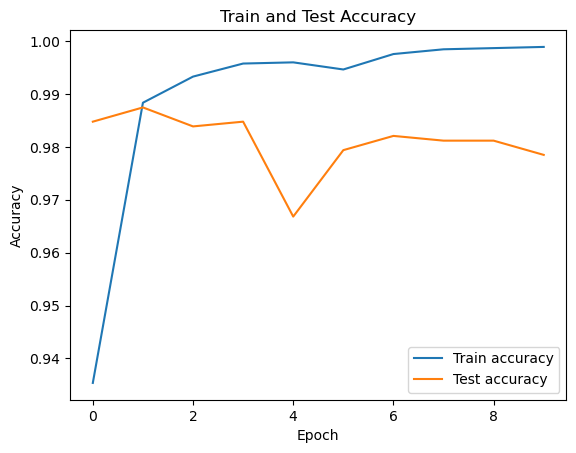

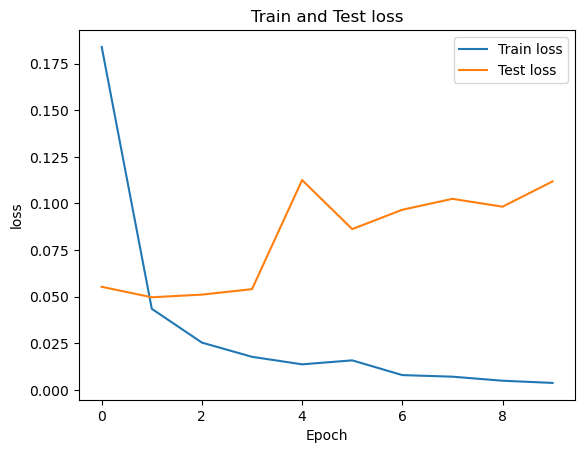

In [67]:
model3_train_acc = history3.history['accuracy'][-1]
model3_test_acc = history3.history['val_accuracy'][-1]
model3_train_acc = history3.history['accuracy'][-1]
model3_test_acc = history3.history['val_accuracy'][-1]

#plotting test vs train accuracies and losses 
plt.plot(history3.history['accuracy'], label='Train accuracy')
plt.plot(history3.history['val_accuracy'], label='Test accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Train and Test Accuracy')
plt.legend()
plt.show()

plt.plot(history3.history['loss'], label='Train loss')
plt.plot(history3.history['val_loss'], label='Test loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.title('Train and Test loss')
plt.legend()
plt.show()

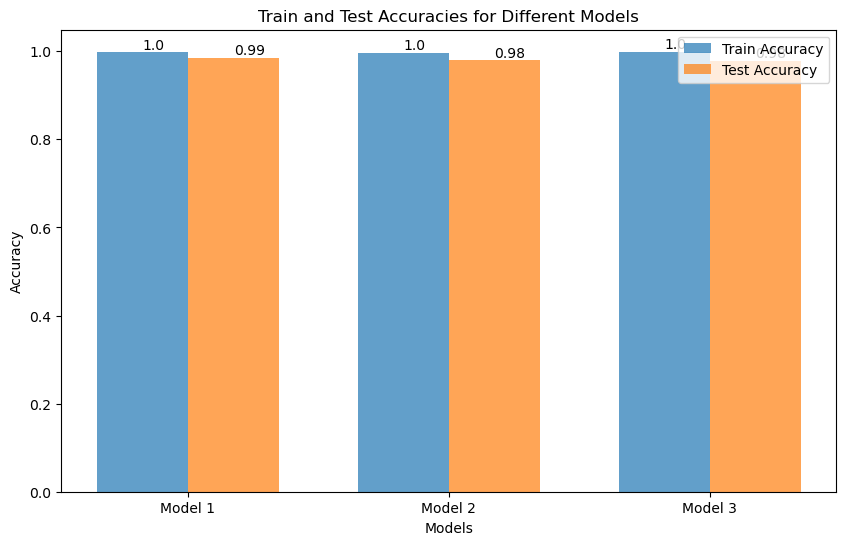

In [68]:
models = ['Model 1', 'Model 2', 'Model 3']
train_acc = [model1_train_acc, model2_train_acc, model3_train_acc]
test_acc = [model1_test_acc, model2_test_acc, model3_test_acc]
#train_loss = [model1_train_loss, model2_train_loss, model3_train_loss]
#test_loss = [model1_test_loss, model2_test_loss, model3_test_loss]

num_models = len(models)
bar_width = 0.35

# Create index for the x-axis
index = np.arange(num_models)

# Plot stacked bar chart
plt.figure(figsize=(10, 6))
train_bars = plt.bar(index - bar_width/2, train_acc, alpha=0.7, label='Train Accuracy', width=bar_width)
test_bars = plt.bar(index + bar_width/2, test_acc, alpha=0.7, label='Test Accuracy', width=bar_width)

# Add numbers on top of each bar
for bar in train_bars + test_bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, round(yval, 2), va='bottom')

# Add labels, title, and legend
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Train and Test Accuracies for Different Models')
plt.xticks(index, models)
plt.legend()

# Show plot
plt.show()

In [69]:
inputs = "WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only."
seq = tokenizer.texts_to_sequences([inputs])
seq = pad_sequences(seq, maxlen=1000)
pred = model.predict(seq)
pred2 = model2.predict(seq)
pred3 = model3.predict(seq)
print(pred, pred2, pred3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 569ms/step
[[0.7010417]] [[0.9972987]] [[0.9999921]]


In [70]:
inputs = "U dun say so early hor... U c already then say..."
seq = tokenizer.texts_to_sequences([inputs])
seq = pad_sequences(seq, maxlen=1000)
pred = model.predict(seq)
pred2 = model2.predict(seq)
pred3 = model3.predict(seq)
print(pred, pred2, pred3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
[[4.551522e-05]] [[8.565559e-05]] [[3.6914128e-06]]


In [71]:
inputs = "Your free ringtone is waiting to be collected. Simply text the password ;MIX' to 85069 to verify. Get Usher and Britney. FML, PO Box 5249, MK17 92H. 450Ppw 16"
seq = tokenizer.texts_to_sequences([inputs])
seq = pad_sequences(seq, maxlen=1000)
pred = model.predict(seq)
pred2 = model2.predict(seq)
pred3 = model3.predict(seq)
print(pred, pred2, pred3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
[[0.7010417]] [[0.9995934]] [[0.9999928]]


In [72]:
inputs = "Congratulations! You have won a jackpot prize! Claim it now to receive your reward." #Unseen Data
seq = tokenizer.texts_to_sequences([inputs])
seq = pad_sequences(seq, maxlen=1000)
pred = model.predict(seq)
pred2 = model2.predict(seq)
pred3 = model3.predict(seq)
print(pred, pred2, pred3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
[[0.7010417]] [[0.9990536]] [[0.9999903]]


In [73]:
inputs = "Congratulation! you have been selected for the data analyst role" #Unseen data
seq = tokenizer.texts_to_sequences([inputs])
seq = pad_sequences(seq, maxlen=1000)
pred = model.predict(seq)
pred2 = model2.predict(seq)
pred3 = model3.predict(seq)
print(pred, pred2, pred3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
[[0.02944365]] [[0.00771339]] [[0.00026104]]
